In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
borrower = pd.read_csv('data/borrower_table.csv')
loan = pd.read_csv('data/loan_table.csv', parse_dates = ['date'])
#print(borrower.head())
print(loan.info())
# join the two tables together
df = pd.merge(left = loan, right = borrower, how = 'left')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   loan_id       101100 non-null  int64         
 1   loan_purpose  101100 non-null  object        
 2   date          101100 non-null  datetime64[ns]
 3   loan_granted  101100 non-null  int64         
 4   loan_repaid   47654 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101100 entries, 2012-03-15 to 2012-05-09
Data columns (total 15 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   loan_purpose                                     101100 non-null  object 
 2  

## Explortory Data

In [2]:
df.loan_purpose.value_counts()

home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: loan_purpose, dtype: int64

(array([21484.,     0., 15504.,     0.,     0., 21707.,     0., 18091.,
            0., 24314.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

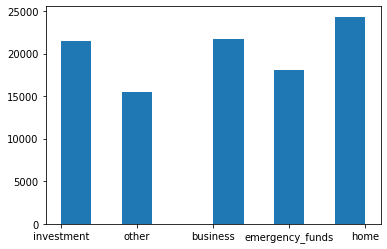

In [3]:
plt.hist(df.loan_purpose)

(array([16948.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 30706.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

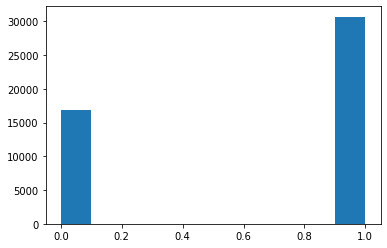

In [4]:
plt.hist(df.loan_repaid)

#### Monthly Loan granted evolution by Loan Purpose

loan_purpose  business  emergency_funds  home  investment  other
date                                                            
2012-01-31         929              642  1032         914    633
2012-02-29         934              607   936         824    574
2012-03-31         893              656   972         938    561
2012-04-30         866              669   918         908    562
2012-05-31         980              723  1026         940    590
2012-06-30         834              660   927         858    576
2012-07-31         916              674  1039         909    590
2012-08-31         889              655   984         909    637
2012-09-30         830              587   873         819    515
2012-10-31         990              681  1056         891    603
2012-11-30         860              641   950         902    537
2012-12-31         852              558   901         791    533


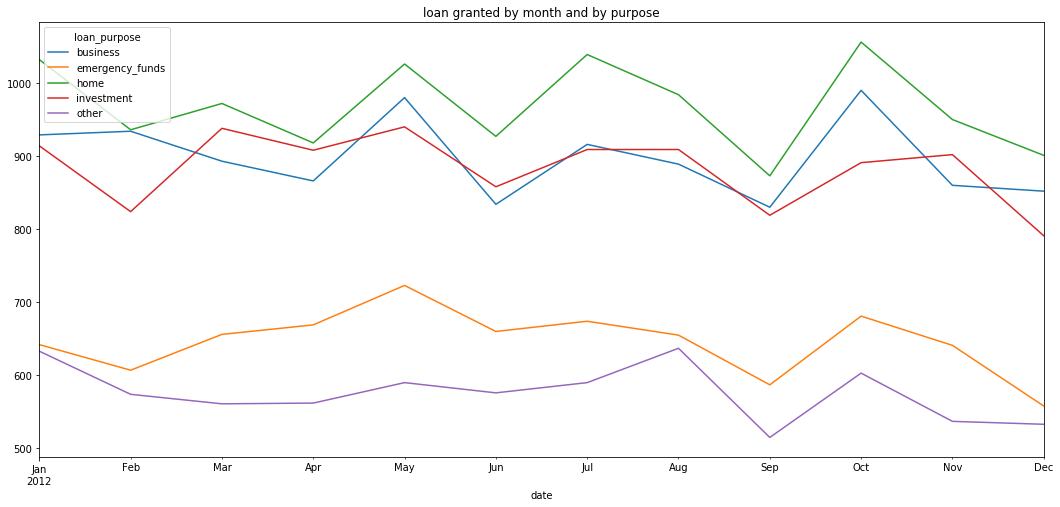

In [5]:
import seaborn as sns
loan_granted_month = df[['loan_granted', 'loan_purpose']].groupby([pd.Grouper(freq = 'M'),'loan_purpose']).sum()
loan_granted_month = loan_granted_month.reset_index()
loan_granted_month.date = pd.to_datetime(loan_granted_month.date)
loan_granted_month_w = loan_granted_month.pivot(
    index = 'date',
    columns = 'loan_purpose',
    values = 'loan_granted'
) 
print(loan_granted_month_w)
loan_granted_month_w.plot(
    kind = 'line', 
    figsize = (18,8),
    title = 'loan granted by month and by purpose'
)  

date             object
loan_purpose     object
loan_repaid     float64
dtype: object
      date     loan_purpose  loan_repaid
0  Jan2012         business        662.0
1  Jan2012  emergency_funds        326.0
2  Jan2012             home        699.0
3  Jan2012       investment        659.0
4  Jan2012            other        338.0


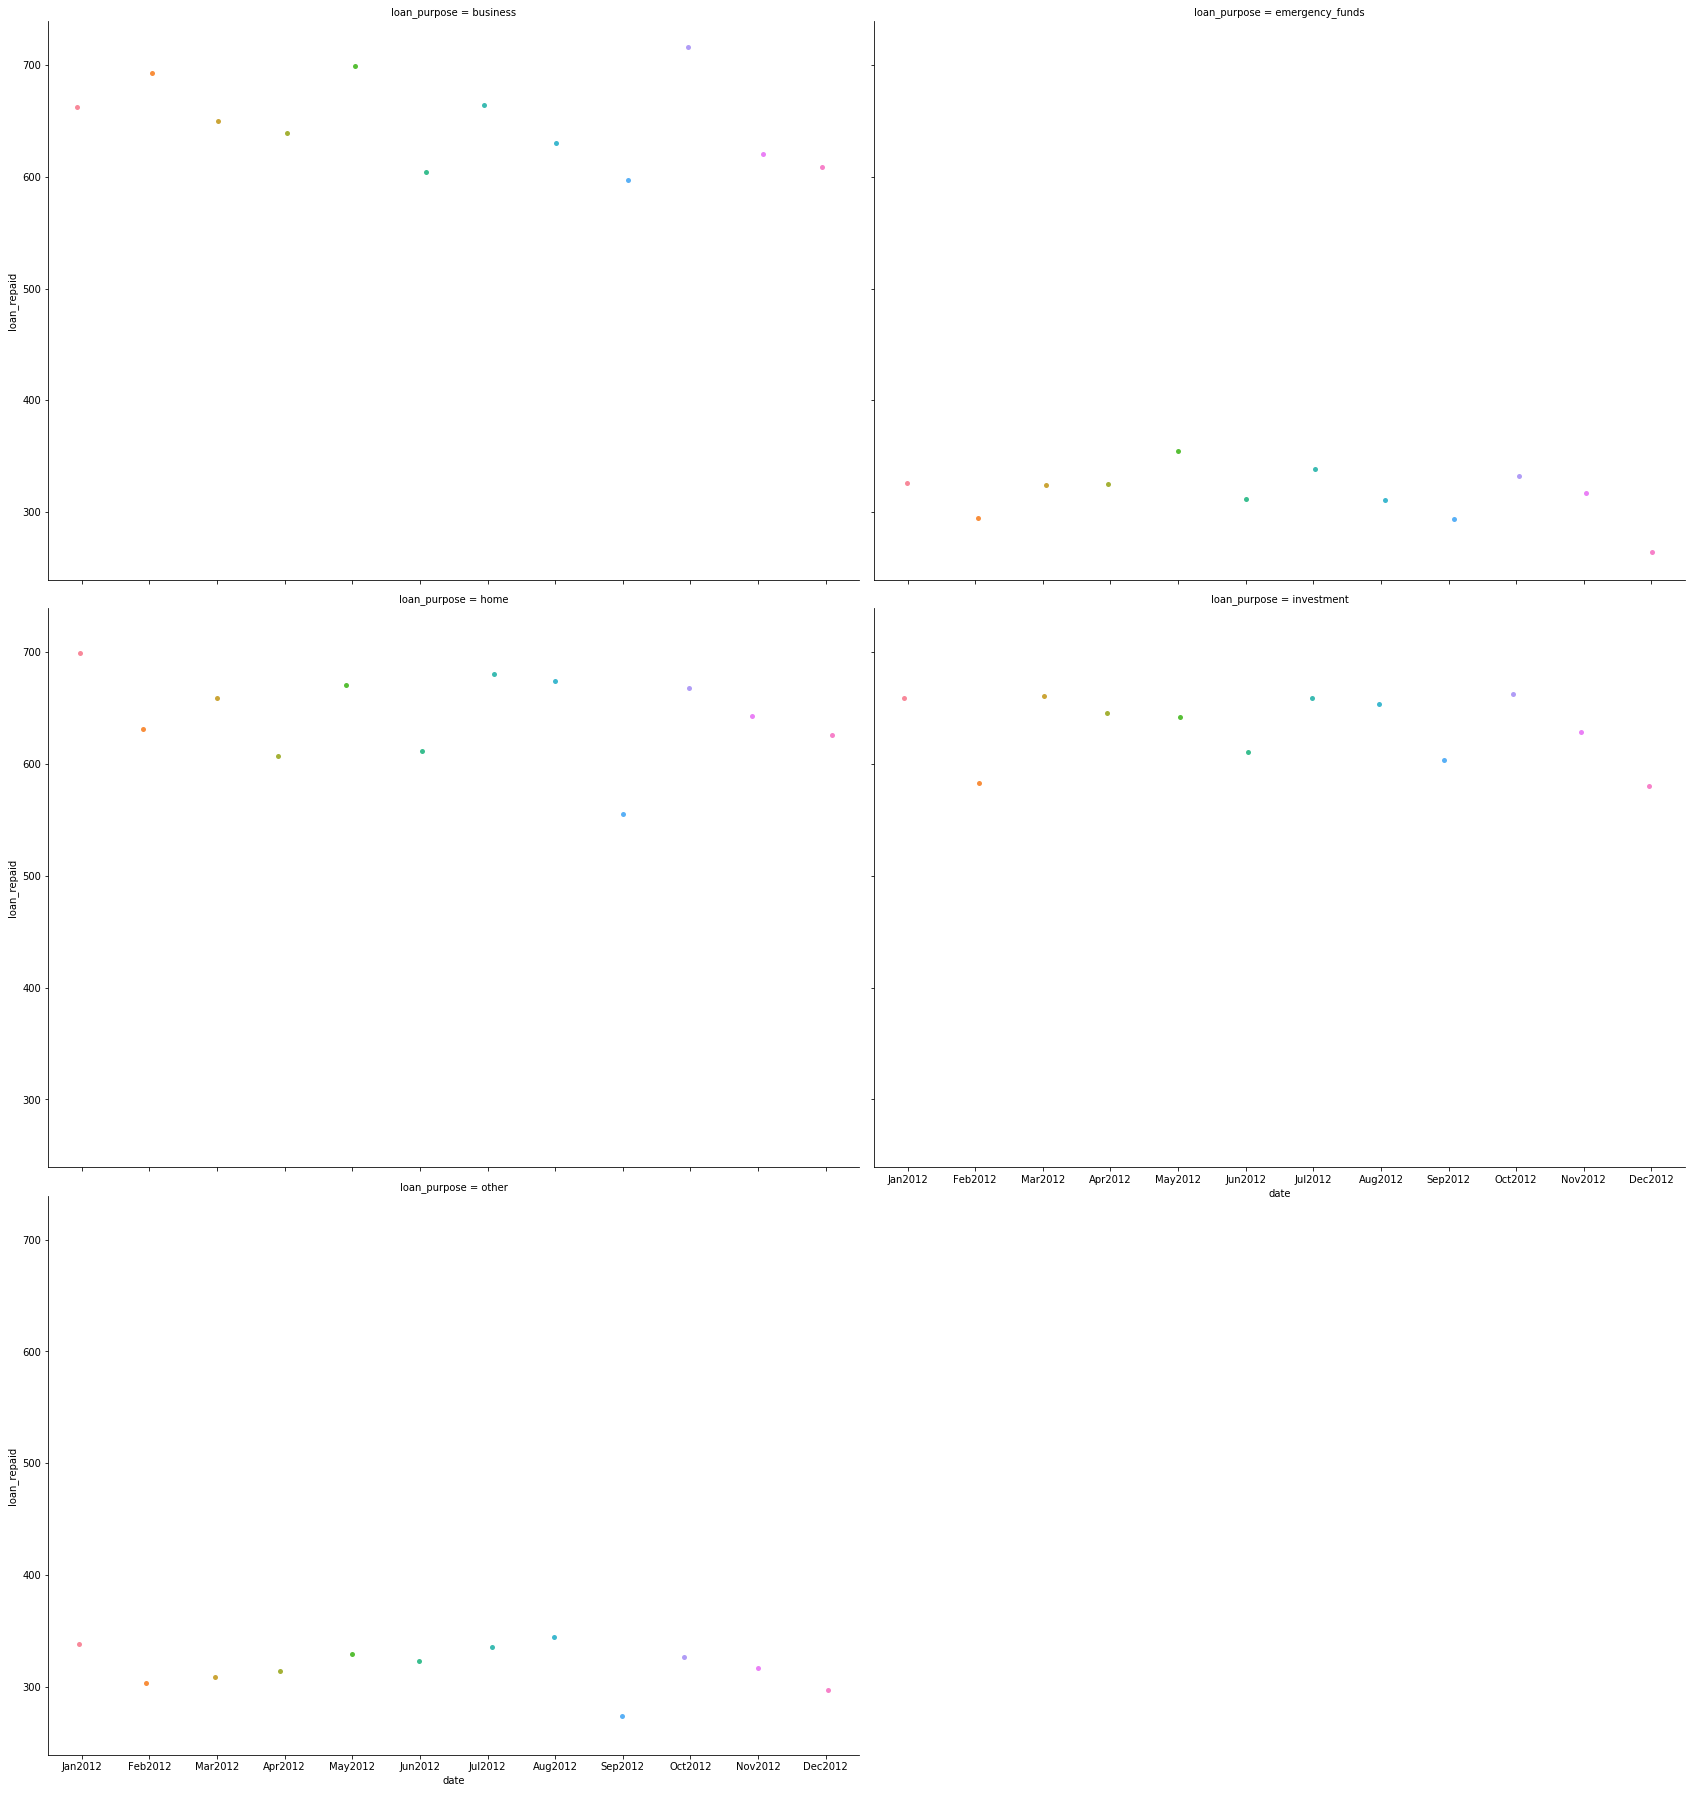

In [6]:
loan_repaid_month = df[['loan_purpose','loan_repaid']].groupby([pd.Grouper(freq = 'M'),'loan_purpose']).sum()
loan_repaid_month = loan_repaid_month.reset_index()
loan_repaid_month.date = loan_repaid_month.date.dt.strftime('%b%Y')
print(loan_repaid_month.dtypes)
print(loan_repaid_month.head()) 
fig = sns.catplot(
    x = loan_repaid_month.date,
    y = 'loan_repaid', 
    col = 'loan_purpose',
    col_wrap = 2,
    height = 8.27,
    aspect = 11.7/8.27,
    data = loan_repaid_month
)

Text(0.5, 1, 'feature correlation with loan_granted')

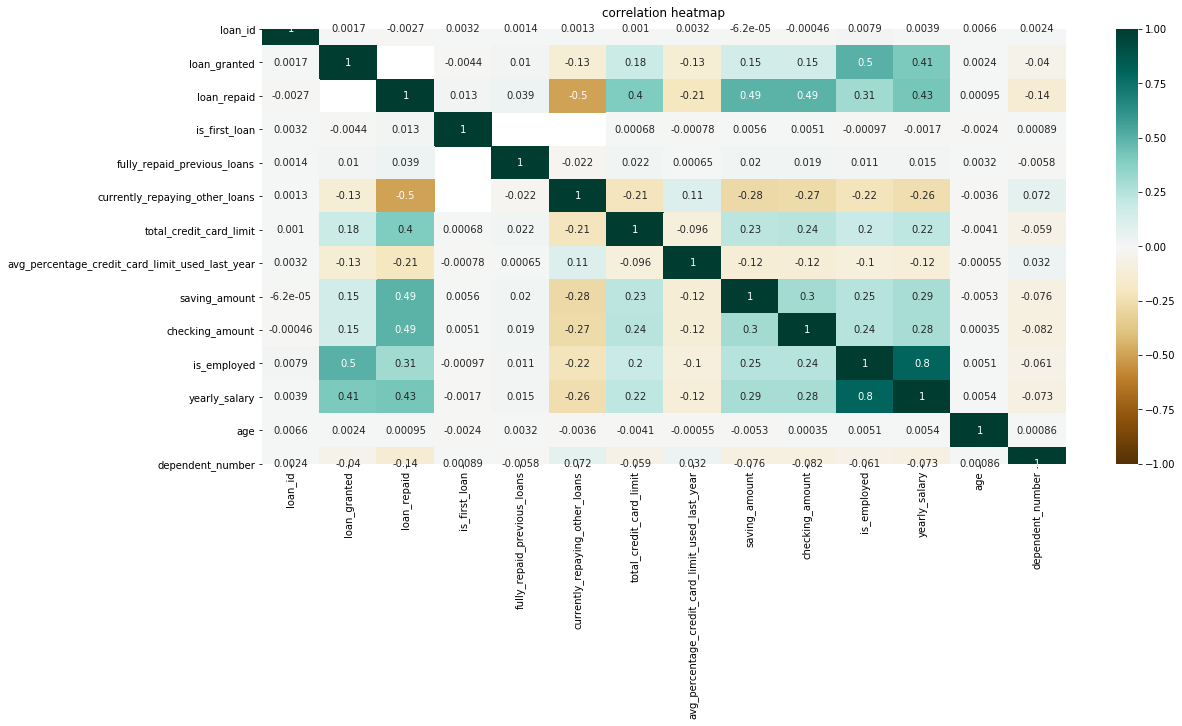

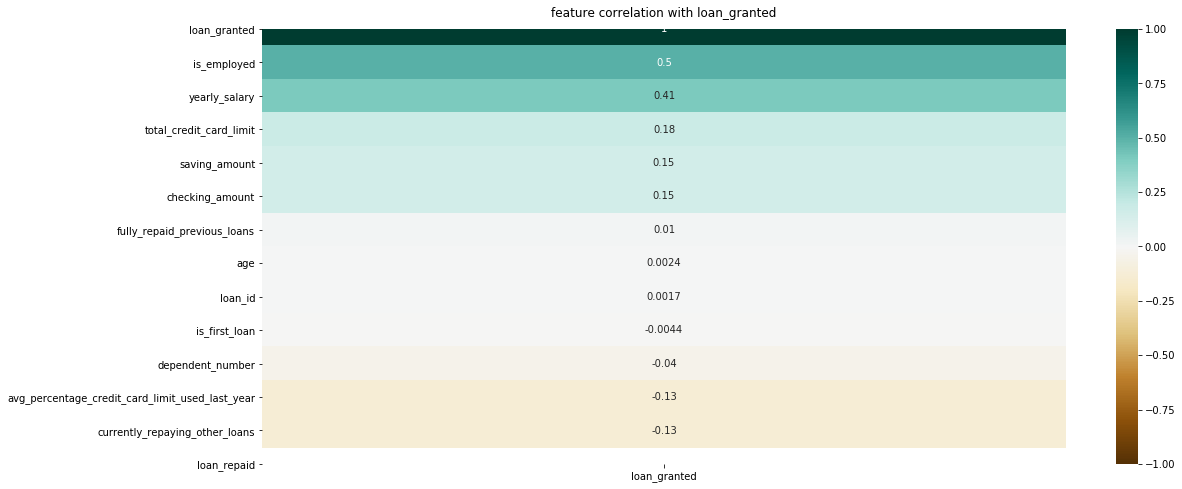

In [7]:
plt.figure(figsize = (18,8))
heatmap_total = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap_total.set_title('correlation heatmap', fontdict = {'fontsize':12}, pad =12)
corr = df.corr()[['loan_granted']].sort_values(by = 'loan_granted', ascending = False)
plt.figure(figsize = (18,8))
heatmap_y = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap_y.set_title('feature correlation with loan_granted', fontdict = {'fontsize':12}, pad =12)

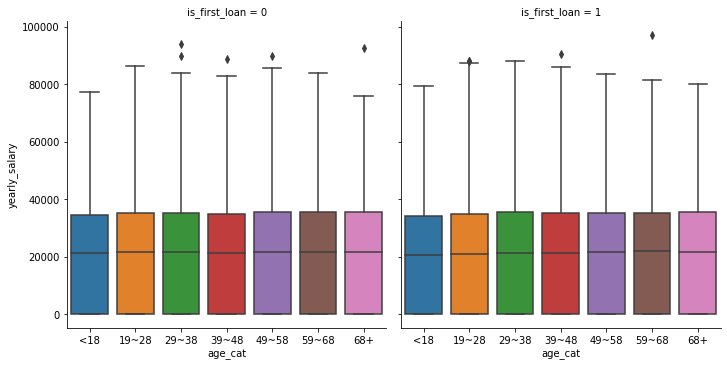

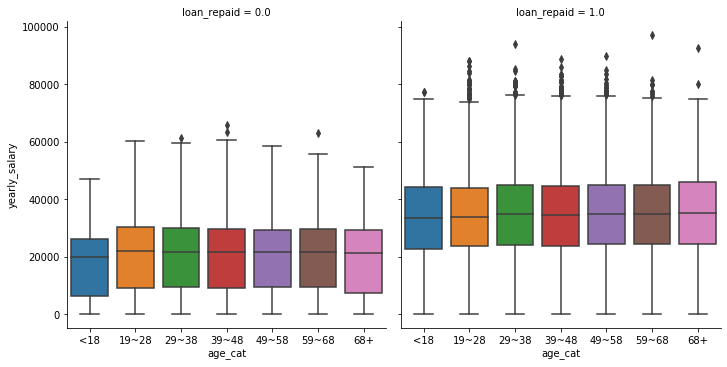

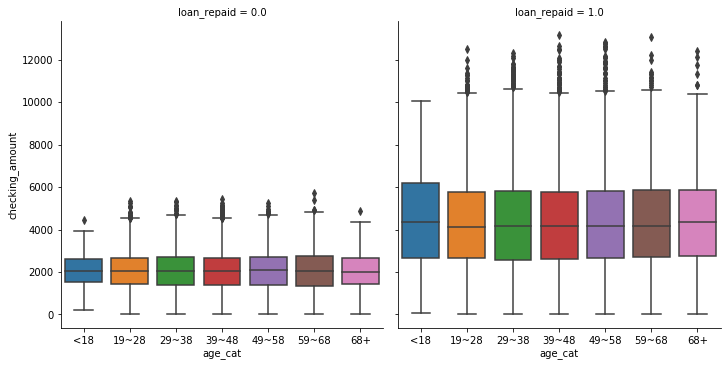

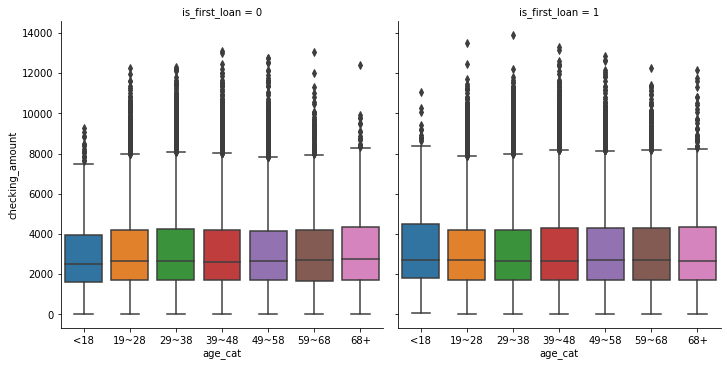

In [8]:
labels = ['<18','19~28','29~38', '39~48', '49~58', '59~68',   '68+']
df['age_cat'] = pd.cut(
    df.age, 
    bins = [0,18,28,38,48,58,68,78], 
    labels = labels
)
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'yearly_salary',
    col = 'is_first_loan',
    kind = 'box',
    col_wrap = 2
)
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'yearly_salary',
    col = 'loan_repaid',
    kind = 'box',
    col_wrap = 2
)
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'checking_amount',
    col = 'loan_repaid',
    kind = 'box',
    col_wrap = 2
)
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'checking_amount',
    col = 'is_first_loan',
    kind = 'box',
    col_wrap = 2
)

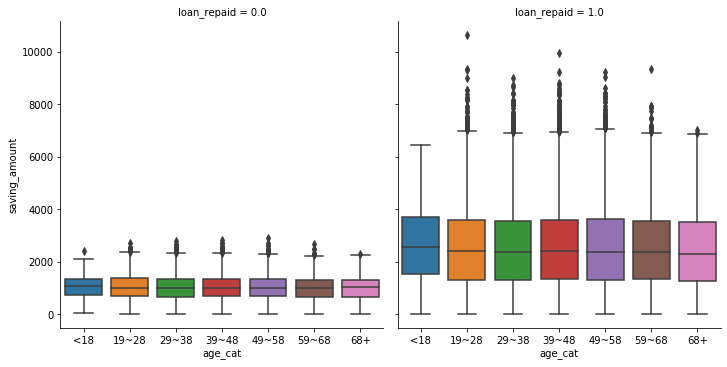

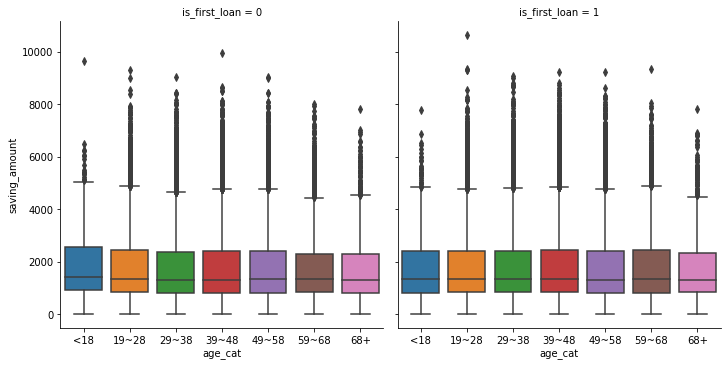

In [9]:
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'saving_amount',
    col = 'loan_repaid',
    kind = 'box',
    col_wrap = 2
)
sns.catplot(
    data = df,
    x = 'age_cat',
    y = 'saving_amount',
    col = 'is_first_loan',
    kind = 'box',
    col_wrap = 2
)

### Model Building
#### Missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101100 entries, 2012-03-15 to 2012-05-09
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype   
---  ------                                           --------------   -----   
 0   loan_id                                          101100 non-null  int64   
 1   loan_purpose                                     101100 non-null  object  
 2   loan_granted                                     101100 non-null  int64   
 3   loan_repaid                                      47654 non-null   float64 
 4   is_first_loan                                    101100 non-null  int64   
 5   fully_repaid_previous_loans                      46153 non-null   float64 
 6   currently_repaying_other_loans                   46153 non-null   float64 
 7   total_credit_card_limit                          101100 non-null  int64   
 8   avg_percentage_credit_card_limit_used_last_year  94128 non-null   fl

In [11]:
# first loaner never fully repaid previous loan?
first_loaner_previously_repaid = (df[df.fully_repaid_previous_loans.isnull()]['loan_id'] == df[df.is_first_loan == 1]['loan_id']).value_counts()
print(f'No first loaner have previous fully repaid loan? {first_loaner_previously_repaid}')
# first loaner never currently repaying other loan?
first_loaner_currently_repaying = (df[df.currently_repaying_other_loans.isnull()]['loan_id'] == df[df.is_first_loan == 1]['loan_id']).value_counts()
print(f'No first loaner is  currently repaying any other loan? {first_loaner_currently_repaying}')
# fill NA
df.fully_repaid_previous_loans.fillna(-1, inplace = True)
df.currently_repaying_other_loans.fillna(-1, inplace = True)

No first loaner have previous fully repaid loan? True    54947
Name: loan_id, dtype: int64
No first loaner is  currently repaying any other loan? True    54947
Name: loan_id, dtype: int64


In [12]:
# loan_repaid is NA because loan application is denied?
loan_denied = (df[df.loan_repaid.isnull()]['loan_id'] == df[df.loan_granted == 0]['loan_id']).value_counts()
print(f'every denied loan application doesn\'t have infor in loan_repaid? {loan_denied}')
df.loan_repaid.fillna(-1, inplace = True)

every denied loan application doesn't have infor in loan_repaid? True    53446
Name: loan_id, dtype: int64


In [13]:
# avg_percentage_credit_card_limit_used_last_year  is NA because of no credit card?
no_credit = (df[df.avg_percentage_credit_card_limit_used_last_year.isnull()]['loan_id'] == df[df.total_credit_card_limit == 0]['loan_id']).value_counts()
print(f'avg_percentage_credit_card_limit_used_last_year  is NA because of no credit card? {no_credit}')
df.avg_percentage_credit_card_limit_used_last_year.fillna(-1, inplace = True)

avg_percentage_credit_card_limit_used_last_year  is NA because of no credit card? True    6972
Name: loan_id, dtype: int64


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101100 entries, 2012-03-15 to 2012-05-09
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype   
---  ------                                           --------------   -----   
 0   loan_id                                          101100 non-null  int64   
 1   loan_purpose                                     101100 non-null  object  
 2   loan_granted                                     101100 non-null  int64   
 3   loan_repaid                                      101100 non-null  float64 
 4   is_first_loan                                    101100 non-null  int64   
 5   fully_repaid_previous_loans                      101100 non-null  float64 
 6   currently_repaying_other_loans                   101100 non-null  float64 
 7   total_credit_card_limit                          101100 non-null  int64   
 8   avg_percentage_credit_card_limit_used_last_year  101100 non-null  fl

Text(0.5, 1, 'correlation heatmap')

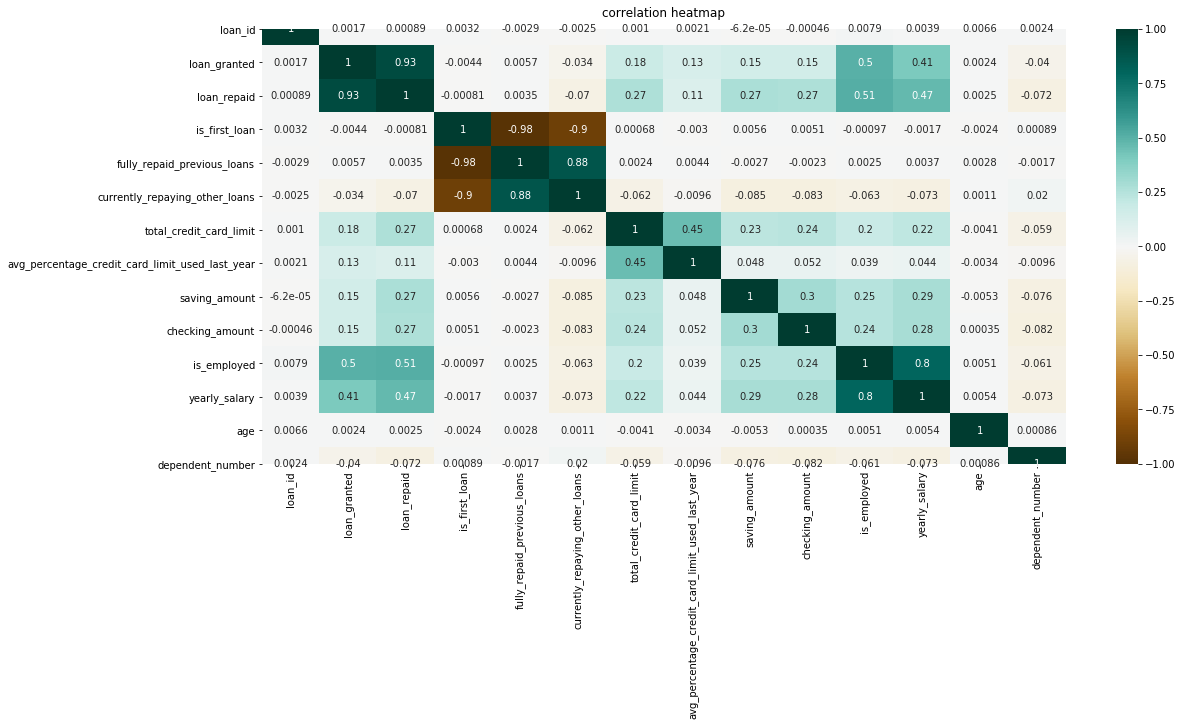

In [14]:
df.info()
plt.figure(figsize = (18,8))
heatmap_total = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap_total.set_title('correlation heatmap', fontdict = {'fontsize':12}, pad =12)               

In [15]:
# delete column is_first_loan
print(f'before deletion {df.columns}')
del df['is_first_loan']
print(f'after deletion {df.columns}')

before deletion Index(['loan_id', 'loan_purpose', 'loan_granted', 'loan_repaid',
       'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'age_cat'],
      dtype='object')
after deletion Index(['loan_id', 'loan_purpose', 'loan_granted', 'loan_repaid',
       'fully_repaid_previous_loans', 'currently_repaying_other_loans',
       'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'age_cat'],
      dtype='object')


Text(0.5, 1, 'correlation heatmap')

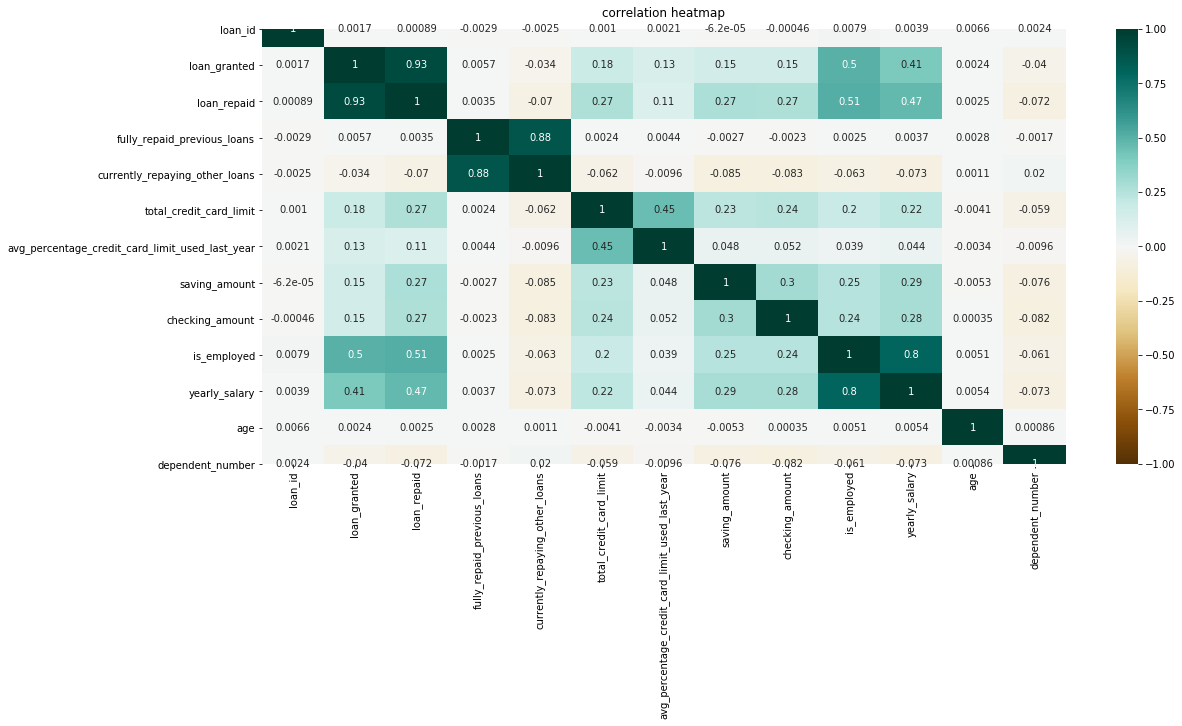

In [16]:
plt.figure(figsize = (18,8))
heatmap_total = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap_total.set_title('correlation heatmap', fontdict = {'fontsize':12}, pad =12)               

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df = df.reset_index()
df['date_month'] = pd.to_datetime(df.date).dt.month
df['date_week'] = pd.to_datetime(df.date).dt.isocalendar().week

In [18]:
del df['loan_id']
del df['date']

In [19]:
del df['age']
df.head()

,loan_purpose,loan_granted,loan_repaid,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,dependent_number,age_cat,date_month,date_week
0,investment,0,-1.0,-1.0,-1.0,8600,0.79,1491,6285,1,45200,7,39~48,3,11
1,investment,0,-1.0,-1.0,-1.0,5300,0.52,141,5793,0,0,5,39~48,1,3
2,other,0,-1.0,-1.0,-1.0,0,-1.00,660,3232,1,26500,4,59~68,2,6
3,other,1,1.0,1.0,0.0,5400,0.52,3345,2764,1,15800,4,49~58,6,26
4,business,1,0.0,-1.0,-1.0,2900,0.76,1050,3695,1,34800,4,29~38,5,21


In [20]:
df_granted = df.query('loan_granted == 1')
del df_granted['loan_granted']
repaid_df = pd.get_dummies(df_granted, drop_first = True) 
repaid_y = repaid_df.loan_repaid
repaid_x = repaid_df.loc[:,repaid_df.columns!='loan_repaid']
x_train,x_test,y_train,y_test = train_test_split(repaid_x,repaid_y,test_size=0.3,random_state=0,stratify=repaid_y)

In [21]:
x_train.head()

,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,dependent_number,date_month,...,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other,age_cat_19~28,age_cat_29~38,age_cat_39~48,age_cat_49~58,age_cat_59~68,age_cat_68+
96138,-1.0,-1.0,2300,0.04,1547,1079,0,0,1,9,...,0,0,1,0,0,0,0,1,0,0
70807,-1.0,-1.0,3100,0.66,1454,4328,1,15600,6,3,...,0,1,0,0,0,0,0,0,1,0
32803,1.0,1.0,2200,0.75,238,1483,0,0,4,1,...,1,0,0,0,0,0,1,0,0,0
85485,1.0,0.0,1900,0.92,2374,4601,1,67600,3,11,...,0,0,1,0,0,0,1,0,0,0
76978,0.0,0.0,4400,0.87,2519,3881,1,43500,1,10,...,1,0,0,0,0,0,1,0,0,0


In [22]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
search_space = {
    'max_depth':[4,8],
    'min_samples_leaf':[4,6],
    'max_features': [4,8]
}
rf_grid = GridSearchCV(rf,search_space,cv = 5, scoring = 'precision').fit(x_train,y_train)
rf_grid.score(x_test,y_test)

0.953887884267631

In [23]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None,title=None, **kwargs):
    """
    Create a confusion matrix heatmap to evaluate classification.
    Parameters:
    - y_test: The true values for y
    - preds: The predicted values for y
    - class_labels: What to label the classes.
    - ax: The matplotlib Axes object to plot on.
    - title: The title for the confusion matrix
    - kwargs: Additional keyword arguments for `seaborn.heatmap()`
    Returns: A confusion matrix heatmap.
    """
    mat = confusion_matrix(y_true, y_pred)
    axes = sns.heatmap(
    mat.T, square=True, annot=True, fmt='d',
    cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
    )
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title(title or 'Confusion Matrix')
    return axes

In [24]:
print(rf_grid.best_params_)

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 6}


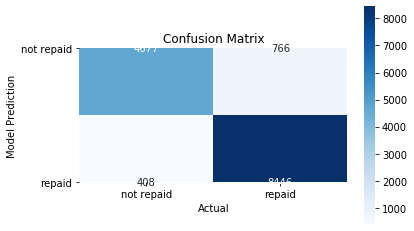

In [25]:
final_model = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features=8,max_depth=8, min_samples_leaf = 4)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
confusion_matrix_visual(y_test,pred, ['not repaid','repaid']) 

In [26]:
y_test.value_counts()

1.0    9212
0.0    5085
Name: loan_repaid, dtype: int64

$$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$
$$precision = \frac{TP}{TP + FP}$$
$$recall = \frac{TP}{TP + FN}$$
$$F = 2 * \frac{precision*recall}{precision+recall}$$

In [27]:
accuracy = (8429+4696)/(8429+783+4696+389)
print(f'accuracy:the percentage of correctly classified values {accuracy}')
precision = (8429)/(8429 + 389)
print(f'precision:the ratio of true positives to everything flagged positive {precision}')
recall = (8429)/(8429 + 783)
print(f'recall:the ratio of true positives to everything actually positive {recall}')

accuracy:the percentage of correctly classified values 0.918024760439253
precision:the ratio of true positives to everything flagged positive 0.9558856883647086
recall:the ratio of true positives to everything actually positive 0.9150021710811984


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      5085
         1.0       0.95      0.92      0.94      9212

    accuracy                           0.92     14297
   macro avg       0.91      0.92      0.91     14297
weighted avg       0.92      0.92      0.92     14297



In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9178848709519479

In [30]:
importance = {'features': x_train.columns, 'importance':rf_grid.best_estimator_.feature_importances_}
importance = pd.DataFrame(importance)
print(importance.sort_values(by = 'importance', ascending = False))

                                           features  importance
4                                     saving_amount    0.385389
5                                   checking_amount    0.302680
7                                     yearly_salary    0.134510
2                           total_credit_card_limit    0.099713
1                    currently_repaying_other_loans    0.034545
6                                       is_employed    0.023101
3   avg_percentage_credit_card_limit_used_last_year    0.010524
8                                  dependent_number    0.002394
11                     loan_purpose_emergency_funds    0.001706
10                                        date_week    0.001476
0                       fully_repaid_previous_loans    0.001418
9                                        date_month    0.000798
14                               loan_purpose_other    0.000401
13                          loan_purpose_investment    0.000358
16                                    ag

## better than bank decision?

In [31]:
pred

array([0., 1., 1., ..., 0., 0., 1.])

In [32]:
bank_performance = (df_granted.loan_repaid == 1).sum() - (df_granted.loan_repaid == 0).sum()
print(f'bank performance: {bank_performance}')
prediction =  final_model.predict(repaid_x)
model_performance = ((prediction == 1) & (df_granted.loan_repaid == 1)).sum() - ((prediction == 1) & (df_granted.loan_repaid == 0)).sum()
print(f'model_performance:{model_performance}')

bank performance: 13758
model_performance:26983


## how does the most important variable impact the outcome?

In [34]:
import sys
print(sys.path)

['/Users/chenxi/Documents/MyProgram/MyPython/BookClub/InterviewTakeHomeChallenges/Session4', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/chenxi/Documents/MyProgram/MyPython/BookClub/InterviewTakeHomeChallenges/takehome_env/lib/python3.7/site-packages', '/Users/chenxi/Documents/MyProgram/MyPython/BookClub/InterviewTakeHomeChallenges/takehome_env/lib/python3.7/site-packages/IPython/extensions', '/Users/chenxi/.ipython']


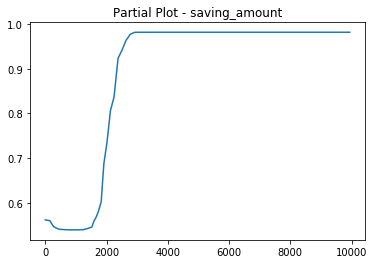

In [36]:
from pdpbox import pdp, info_plots
pdp_iso = pdp.pdp_isolate(model=final_model, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature='saving_amount', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Partial Plot - saving_amount')
plt.show()

## focus on the variable is_employed, how does this var impact the model?

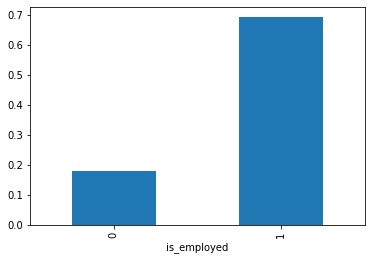

In [38]:
df_granted.groupby(['is_employed'])['loan_repaid'].mean().plot.bar()

In [40]:
from scipy.stats import pearsonr
print(f'correlation between is_employed and yearly salary is :{pearsonr(df.yearly_salary, df.is_employed)[0]}')

correlation between is_employed and yearly salary is :0.7990505464063626
